In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [82]:
#Zadanie 1
from scipy.spatial.distance import euclidean, cityblock
from scipy.spatial.distance import minkowski, cosine

df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")
df.drop(columns="Ubezp.", inplace=True)
print(df)

d_eucl1 = euclidean(df.loc["A"], df.loc["B"])

print(f"\nPierwsze obliczenie odległości euklidesowej: {d_eucl1}")

df["Zarobki (tys.)"] = df["Zarobki (tys.)"] * 1000
df.rename(columns={"Zarobki (tys.)": "Zarobki (zł)"}, inplace=True)

d_eucl2 = euclidean(df.loc["A"], df.loc["B"])
print(f"Drugie obliczenie odległości euklidesowej (zmieniona skala dla atrybutu zarobki): {d_eucl2}")
print("Odległość została zaburzona przez zmianę skali")

for col in df.columns:
    df[col] = df[col] / df[col].std()
d_eucl3 = euclidean(df.loc["A"], df.loc["B"])
print(f"Trzecie obliczenie odległości euklidesowej (dzielenie przez odchylenie standardowe): {d_eucl3}")

d_manhattan = cityblock(df.loc["A"], df.loc["B"])
print(f"Odległość Manhattan: {d_manhattan}")

d_minkowski1 = minkowski(df.loc["A"], df.loc["B"], 1)
print(f"Odległość Minkowskiego (p = 1): {d_minkowski1}")

d_minkowski2 = minkowski(df.loc["A"], df.loc["B"], 2)
print(f"Odległość Minkowskiego (p = 2): {d_minkowski2}")

print("Jak widać odległość Minkowskiego dla p = 1 to odległość Manhattan, a dla p = 2 to odległość euklidesowa")

   Wzrost (cm)  Waga (kg)  Staz (lata)  Zarobki (tys.)  Ocena (pkt.)  Piętro  \
A          190         88            3             3.5             7       6   
B          172         70           12             4.3             5       1   

   Dzieci  Odleglosc (km)  
A       1              25  
B       4              12  

Pierwsze obliczenie odległości euklidesowej: 30.604574821421714
Drugie obliczenie odległości euklidesowej (zmieniona skala dla atrybutu zarobki): 800.5847862656397
Odległość została zaburzona przez zmianę skali
Trzecie obliczenie odległości euklidesowej (dzielenie przez odchylenie standardowe): 4.000000000000001
Odległość Manhattan: 11.313708498984763
Odległość Minkowskiego (p = 1): 11.313708498984763
Odległość Minkowskiego (p = 2): 4.000000000000001
Jak widać odległość Minkowskiego dla p = 1 to odległość Manhattan, a dla p = 2 to odległość euklidesowa


In [83]:
def lcs(X, Y, m, n):
    if m == 0 or n == 0:
       return 0;
    elif X[m-1] == Y[n-1]:
       return 1 + lcs(X, Y, m-1, n-1);
    else:
       return max(lcs(X, Y, m, n-1), lcs(X, Y, m-1, n));

def get_D_x_y(x, y):
  d = len(x) + len(y) - 2 * lcs(x, y, len(x), len(y))
  return d

x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

3
5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

v_dict = []

films = [film1, film2, film3]

for film in films:
  film = film.split(' ')
  for word in film:
    if word not in v_dict:
      v_dict.append(word)

print(f"Słownik:\n{v_dict}")

vectorizer = CountVectorizer(vocabulary=v_dict)
X = vectorizer.fit_transform(films)
print(f"Reprezentacja wektorowa:\n{X.toarray()}")

d_cos = []

for i in range(len(X.toarray())):
  for j in range(len(X.toarray())):
    if(i < j):
      d_cos.append([[f"{i} i {j}"],[cosine(X.toarray()[i], X.toarray()[j])]])

i = 0
for name, value in d_cos:
  if(i == 0):
    max_value = value
    max_name = name
    min_value = value
    min_name = name
    i += 1
  elif(value > max_value):
    max_value = value
    max_name = name
  elif(value < min_value):
    min_value = value
    min_name = name
  print(f"{name}: {value}")
print(f"Najbardziej podobne: {min_name}, najmniej podobne: {max_name}")

film4 = "rakieta mars astronauta czerwona planeta"
films.append(film4)
X = vectorizer.fit_transform(films)
film4_cos = []
for i in range(len(X.toarray()) - 1):
  film4_cos.append(cosine(X.toarray()[i], X.toarray()[3]))
  print(i, film4_cos[i])
  if(i == 0):
    min_value = film4_cos[i]
    min_name = i
  elif(film4_cos[i] < min_value):
    min_value = film4_cos[i]
    min_name = i
print(f"Film4 jest najbardziej podobny do filmu o indeksie {min_name}")


Słownik:
['kosmiczna', 'stacja', 'astronauta', 'planeta', 'obca', 'rakieta', 'księżyc', 'misja', 'wampir', 'zamek', 'noc', 'krew', 'mroczny']
Reprezentacja wektorowa:
[[1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1]]
['0 i 1']: [np.float64(0.6)]
['0 i 2']: [np.float64(1.0)]
['1 i 2']: [np.float64(1.0)]
Najbardziej podobne: ['0 i 1'], najmniej podobne: ['0 i 2']
0 0.4836022205056778
1 0.4836022205056778
2 1.0
Film4 jest najbardziej podobny do filmu o indeksie 0


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

        # X1        X2
0   2.131415  1.138857
1   2.161723  0.656595
2   1.062696  5.176351
3   1.807096  0.449191
4   2.269087  1.321608
..       ...       ...
75  1.494932  3.858488
76  3.209033  1.785973
77 -2.421659  3.181517
78 -1.931504  2.936981
79  0.959361  4.560786

[80 rows x 2 columns]


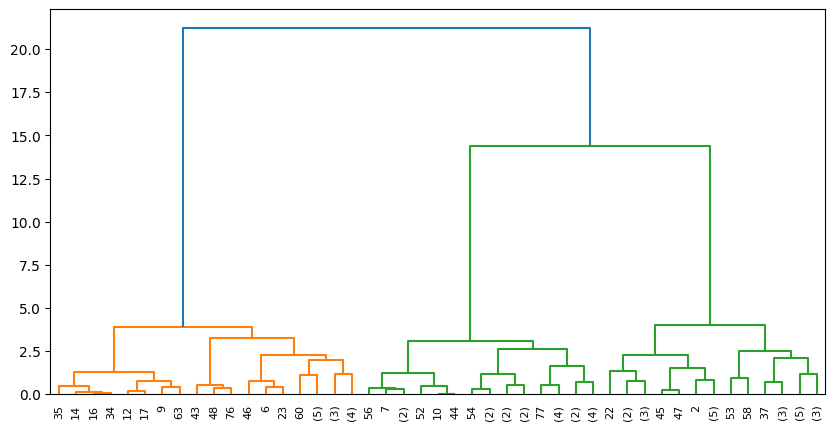

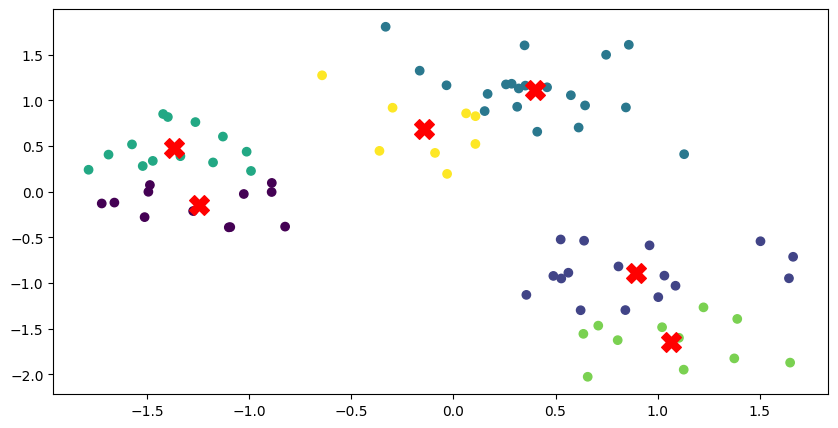

In [85]:
#A
df = pd.read_csv("k_means_data.csv", delimiter=",")
print(df)

#B
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
Z = linkage(df, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.show()
labels = fcluster(Z, t=3 , criterion='maxclust')

#C
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(df_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 5))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=labels, cmap='viridis')
plt.scatter(centers [: ,0] , centers [: ,1], c ='red', marker='X', s=200)


## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [104]:
#Zadanie 5
df = pd.read_csv("k_means_data.csv", delimiter=",")
print(df)

def k_means(df, n):
    points = df.copy()
    points.columns = ["x", "y"]
    centroids = points.sample(n=n).values
    cluster_labels = []
    iterations = 0

    while True:
        iterations += 1
        new_cluster_labels = []

        for point in points[["x", "y"]].values:
            point = np.array(point)
            distances = []

            for centroid in centroids:
                centroid = np.array(centroid)
                distance = euclidean(point, centroid)
                distances.append(distance)

            shortest_distance = min(distances)
            shortest_distance_index = distances.index(shortest_distance)
            new_cluster_labels.append(shortest_distance_index)

        if new_cluster_labels == cluster_labels:
            return {
                "centroids": centroids,
                "cluster_labels": cluster_labels,
                "iterations": iterations
            }

        cluster_labels = new_cluster_labels
        points["cluster"] = cluster_labels
        centroids = []

        for i in range(n):
            cluster_points = points[points["cluster"] == i]
            new_centroid_x = cluster_points["x"].mean()
            new_centroid_y = cluster_points["y"].mean()
            new_centroid = [new_centroid_x, new_centroid_y]

            centroids.append(new_centroid)

        centroids = np.array(centroids)


        # X1        X2
0   2.131415  1.138857
1   2.161723  0.656595
2   1.062696  5.176351
3   1.807096  0.449191
4   2.269087  1.321608
..       ...       ...
75  1.494932  3.858488
76  3.209033  1.785973
77 -2.421659  3.181517
78 -1.931504  2.936981
79  0.959361  4.560786

[80 rows x 2 columns]


In [105]:
k = 3
kmeans_result = k_means(df, n=k)
cluster_labels = kmeans_result["cluster_labels"]
centers = kmeans_result["centroids"]
iterations = kmeans_result["iterations"]

df["kmeans_cluster"] = cluster_labels

print(f"centers:\n{centers}")
print(f"iterations:\n{iterations}")
print(f"df.head():\n{df.head()}")

centers:
[[ 0.89061308  4.28598166]
 [-1.64346181  3.08940684]
 [ 2.06401581  1.07670184]]
iterations:
4
df.head():
       # X1        X2  kmeans_cluster
0  2.131415  1.138857               2
1  2.161723  0.656595               2
2  1.062696  5.176351               0
3  1.807096  0.449191               2
4  2.269087  1.321608               2


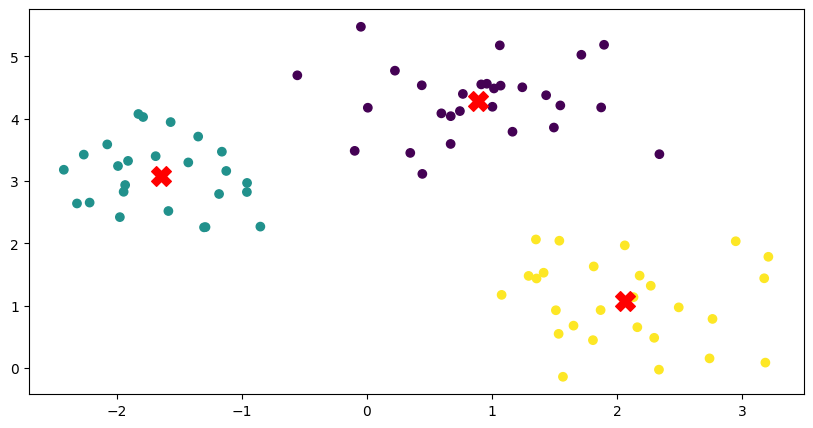

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(df["# X1"], df["X2"], c=cluster_labels, cmap='viridis')
plt.scatter(centers [: ,0] , centers [: ,1], c ='red', marker='X', s=200)
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

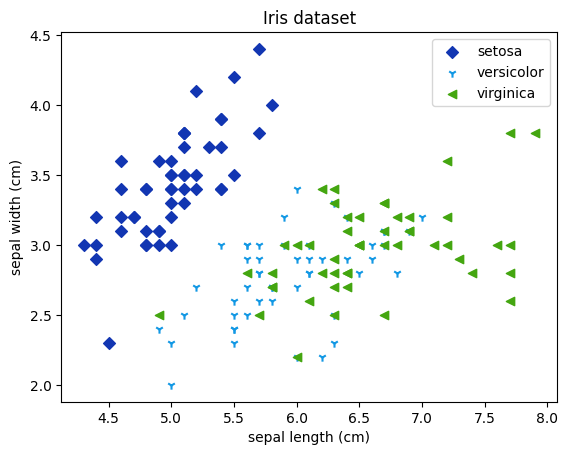

In [109]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["species"] = iris.target
species_names = iris.target_names
print(df_iris)

for i, species_name in enumerate(species_names):
    species_df = df_iris[df_iris["species"] == i]
    color = np.random.rand(3)
    marker = ["o", "s", "D", "v", "^", "<", ">", "1", "2", "3", "4"].pop(np.random.randint(0, 11))

    plt.scatter(species_df["sepal length (cm)"], species_df["sepal width (cm)"], color=color, marker=marker, label=species_name)

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Iris dataset")
plt.show()

In [117]:
print(df_iris.describe())
print(df_iris.corr())

k = 3
iris_kmeans_model = KMeans(n_clusters=k)
iris_kmeans_model.fit(df_iris[["sepal length (cm)", "sepal width (cm)"]])

df_iris["kmeans_cluster"] = iris_kmeans_model.labels_
print(df_iris.head())


k = 3
iris_agg_cluster_model = AgglomerativeClustering(n_clusters=k, linkage="ward")
iris_agg_cluster_model.fit(df_iris)

df_iris["agg_cluster"] = iris_agg_cluster_model.labels_
print(df_iris.head())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  kmeans_cluster  agg_cluster  
count        150.000000  150.000000        150.0000   150.000000  
mean           1.199333    1.000000          0.9800     0.800000  
std            0.762238    0.819232          0.8066     0.794275  
min            0.100000    0.000000          0.0000     0.000000  
25%            0.300000    0.000000          0.0000     0.000000  
50%         

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [130]:
df_penguins = pd.read_csv("penguins.csv", delimiter=",")
print(df_penguins)
print(df_penguins.describe())
print(df_penguins.info())



    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [131]:
print(df_penguins.count())
df_penguins.dropna(inplace=True)
print(df_penguins.count())


species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64
species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64


In [132]:
df_penguins = df_penguins[["bill_length_mm", "flipper_length_mm"]]

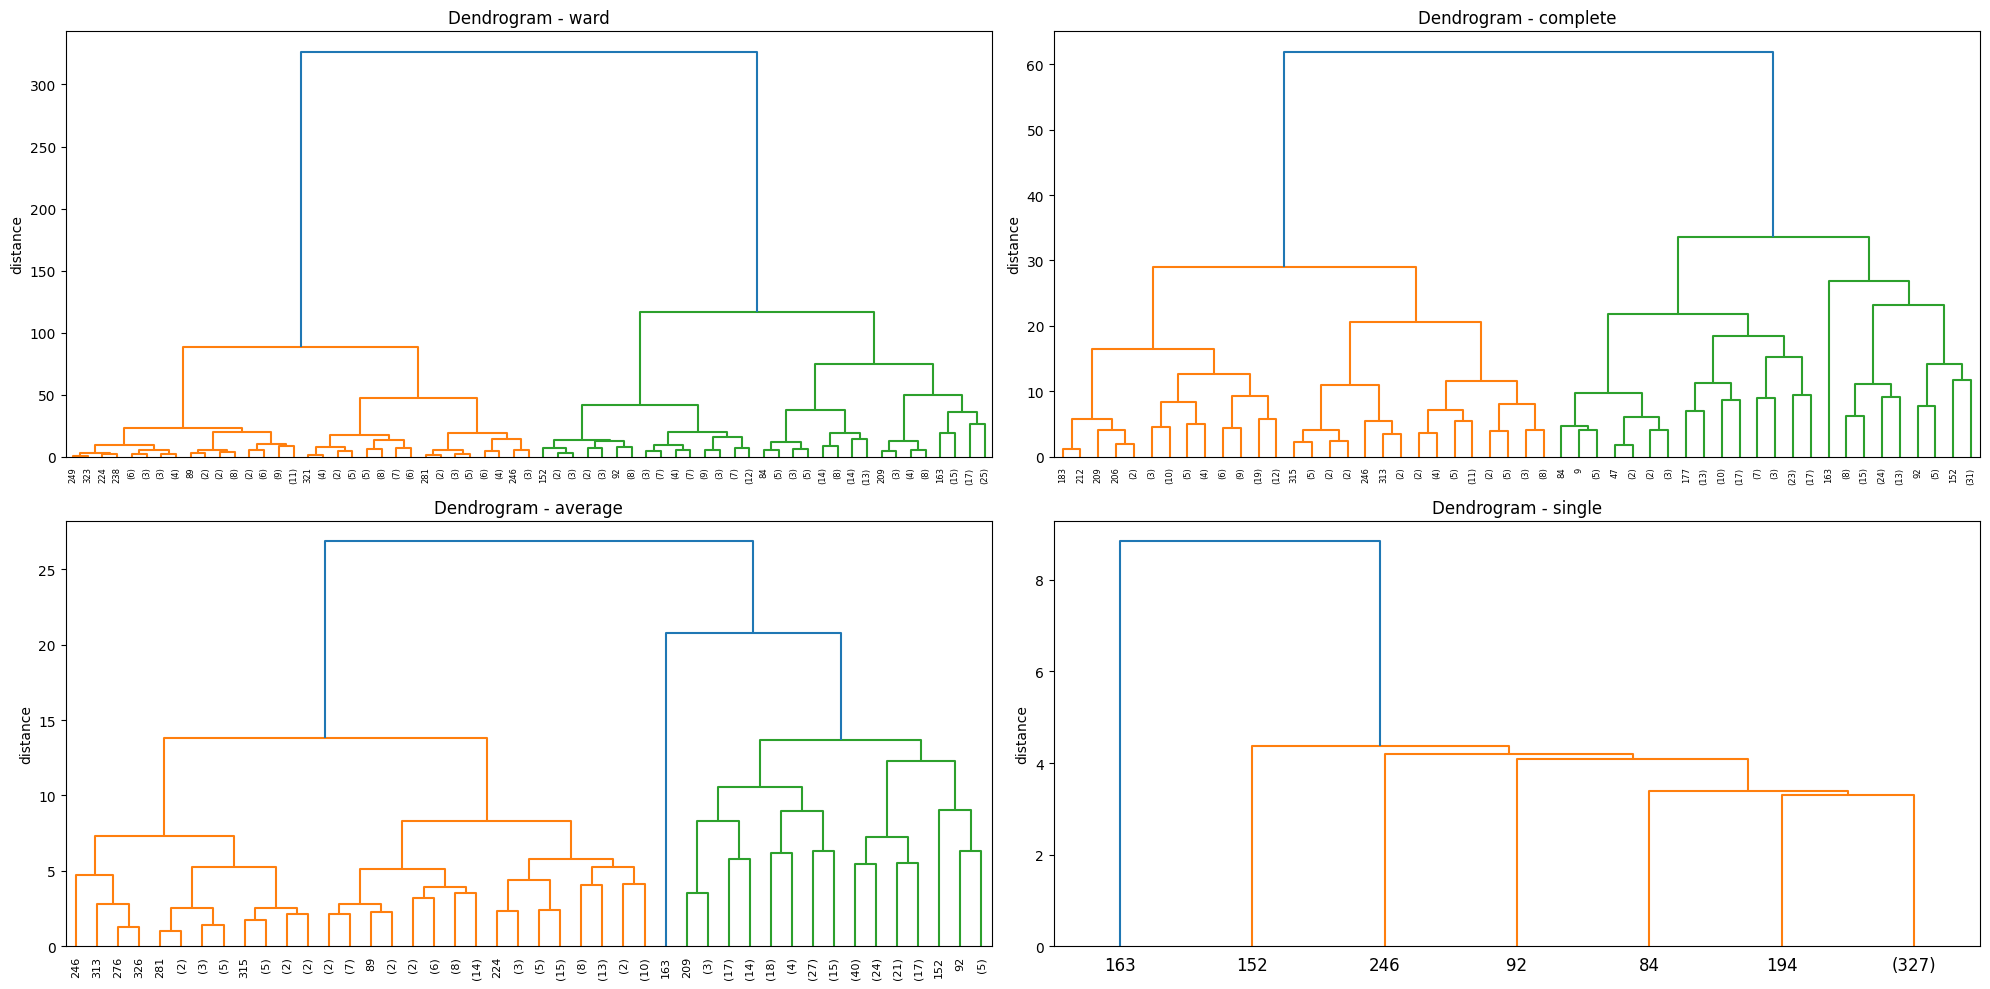

In [133]:
fix, axes = plt.subplots(2, 2, figsize=(20, 10))

methods = ["ward", "complete", "average", "single"]

for ax, method in zip(axes.flatten(), methods):
    linked = linkage(df_penguins, method=method)
    dendrogram(linked, ax=ax, truncate_mode="level", p=5, show_leaf_counts=True)
    ax.set_ylabel("distance")
    ax.set_title(f"Dendrogram - {method}")

plt.tight_layout()
plt.show()

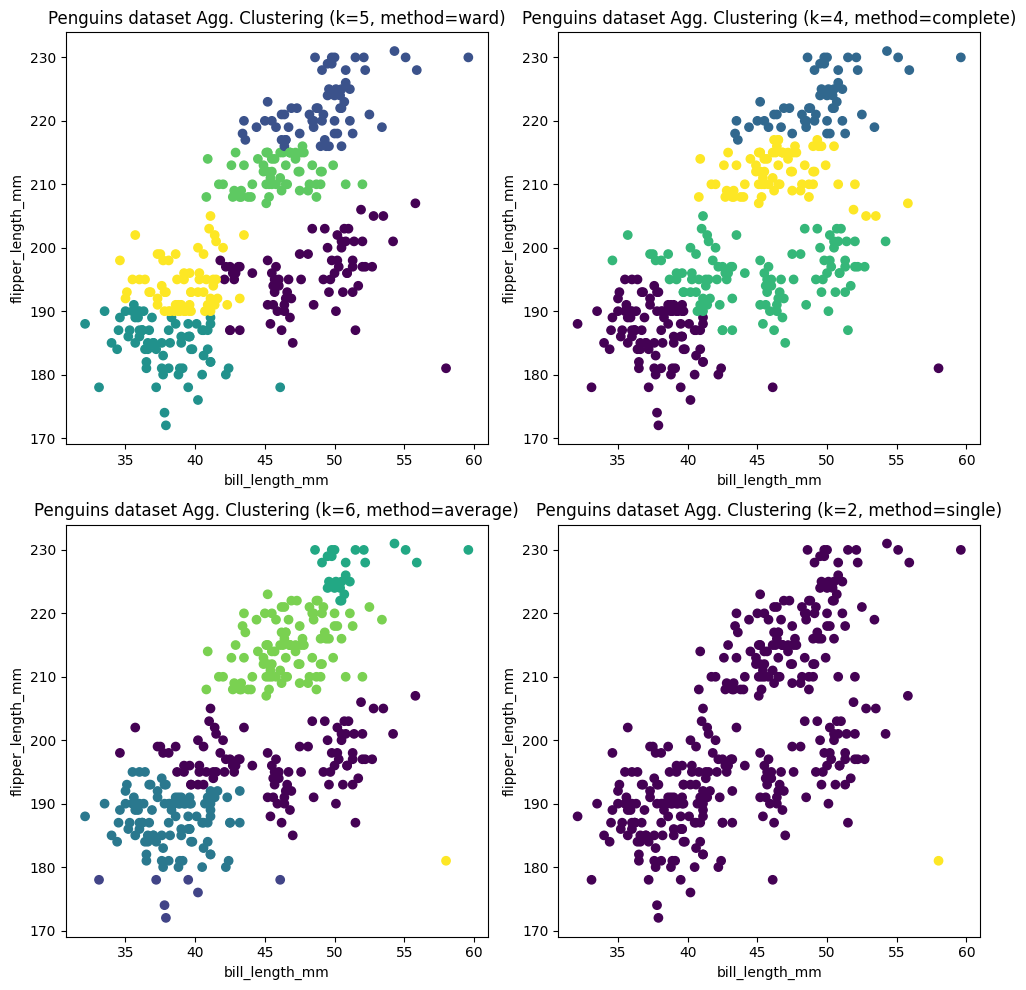

In [135]:
method_ks = [5, 4, 6, 2]
method_clusters = []

for method, k in zip(methods, method_ks):
    penguins_agg_cluster_model = AgglomerativeClustering(n_clusters=k, linkage=method)
    penguins_agg_cluster_model.fit(df_penguins)
    clusters = penguins_agg_cluster_model.labels_
    method_clusters.append(clusters)


fix, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, method, clusters, k in zip(axes.flatten(), methods, method_clusters, method_ks):
    ax.scatter(df_penguins["bill_length_mm"], df_penguins["flipper_length_mm"], c=clusters)
    ax.set_xlabel("bill_length_mm")
    ax.set_ylabel("flipper_length_mm")
    ax.set_title(f"Penguins dataset Agg. Clustering (k={k}, method={method})")

plt.tight_layout()
plt.show()